<a href="https://colab.research.google.com/github/RashmiChrystal/FYP/blob/main/ARIMA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import math
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from matplotlib import pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import io
from math import sqrt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file = pd.read_csv('/content/drive/MyDrive/UOM/FYP/PCAFeatures.csv')
print(file)

     Unnamed: 0  principal component 1  principal component 2
0             0              -8.863416               3.807659
1             1              -8.733930               3.245621
2             2              -8.490162               2.724299
3             3              -8.410476               2.428036
4             4              -8.293180               2.272589
..          ...                    ...                    ...
97           97               9.689719               0.158212
98           98               9.648532               0.183496
99           99               9.496417               0.368401
100         100               9.365149               0.423117
101         101               9.245407               0.428152

[102 rows x 3 columns]


In [4]:
!pip install statsmodels

In [5]:
from statsmodels.tsa.arima_model import ARIMA

In [6]:
PCA1 = file["principal component 1"] 
print(PCA1)

0     -8.863416
1     -8.733930
2     -8.490162
3     -8.410476
4     -8.293180
         ...   
97     9.689719
98     9.648532
99     9.496417
100    9.365149
101    9.245407
Name: principal component 1, Length: 102, dtype: float64


In [7]:
PCA1.describe()

count    1.020000e+02
mean     8.185174e-16
std      8.258100e+00
min     -8.863416e+00
25%     -7.057561e+00
50%     -6.834695e+00
75%      9.730095e+00
max      1.001383e+01
Name: principal component 1, dtype: float64

In [8]:
#model = ARIMA(PCA1, order=(5,1,0))
#model_fit = model.fit()
#print(model_fit.summary())

In [9]:
print(PCA1.values)
X = PCA1.values

[-8.86341604 -8.73392985 -8.4901625  -8.41047602 -8.29318028 -8.25090907
 -8.14509954 -8.1276544  -8.12208321 -8.10788576 -7.95805043 -7.90631024
 -7.75389753 -7.57138219 -7.39678965 -7.18166215 -7.12140295 -7.06425655
 -6.93665648 -6.8859376  -6.88685428 -6.84665465 -6.85914623 -6.87180041
 -6.85969787 -6.8988286  -6.86249955 -6.84947436 -6.87269603 -6.87738809
 -6.83081021 -6.81265669 -6.91413043 -6.84747713 -6.90273985 -8.41047602
 -8.4901625  -6.85577726 -6.84867555 -6.83907874 -6.84890649 -6.8385799
 -6.78138255 -6.8426988  -6.94445214 -6.94445214 -7.03747508 -7.20524768
 -7.40371584 -7.55792265 -7.74379443 -7.88759504 -8.0347237  -6.93859461
 -5.25139665 -3.57518556 -1.43028807  0.77555117  2.71138926  4.47548673
  6.47191561  7.71204477  8.47951332  8.61742343  8.70999196  8.879738
  8.98771465  9.13485586  9.19199188  9.25626842  9.25517996  9.74355318
  9.96769299  9.93396572  9.97098744  9.97098744  9.97705871  9.99319769
  9.99894979  9.99279177  9.95924459  9.97083817  9.98

ADF Test

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(PCA1.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.0606651843750434
p-value: 0.7305006802022856


In [11]:
#pip install pmdarima

In [12]:
from pmdarima.arima.utils import ndiffs

In [13]:
ndiffs(PCA1, test="adf")

2

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

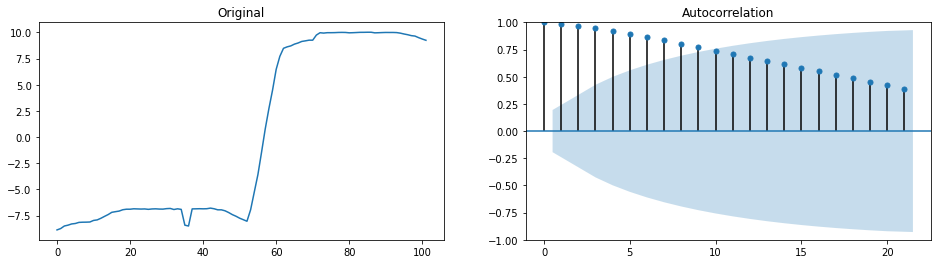

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(PCA1)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(PCA1, ax=ax2);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


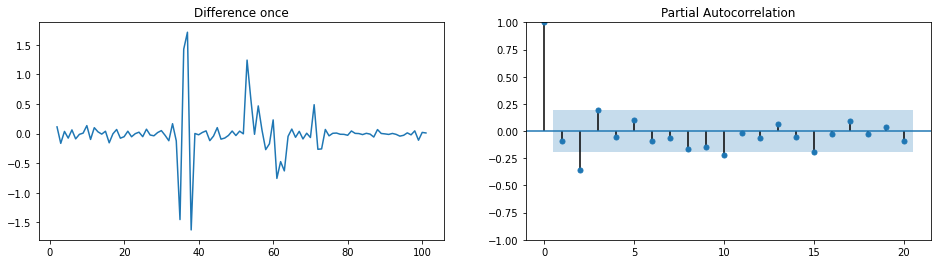

In [17]:
diff = PCA1.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

p = 3 since it's the highest above that region

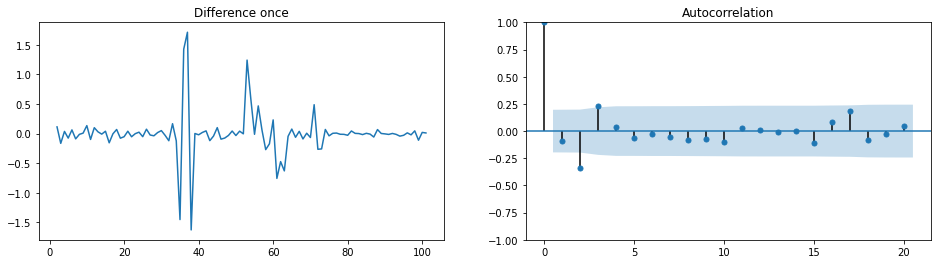

In [18]:
diff = PCA1.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

q = 3

In [19]:
pip install statsmodels --upgrade

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# ARIMA Model
model = ARIMA(PCA1, order=(2, 2, 2))
result = model.fit()
print(result.summary())

                                 SARIMAX Results                                 
Dep. Variable:     principal component 1   No. Observations:                  102
Model:                    ARIMA(2, 2, 2)   Log Likelihood                 -33.994
Date:                   Sun, 30 Jan 2022   AIC                             77.988
Time:                           20:59:20   BIC                             91.014
Sample:                                0   HQIC                            83.260
                                   - 102                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5740      0.267     -2.151      0.031      -1.097      -0.051
ar.L2         -0.2833      0.202     -1.404      0.160      -0.679       0.112
ma.L1          0.5508      0

(array([[0.74490057, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.74490057],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([-8.86341604, -7.52095499, -6.17849394, -4.83603289, -3.49357184,
        -2.15111079, -0.80864974,  0.53381132,  1.87627237,  3.21873342,
         4.56119447]),
 <a list of 102 Lists of Patches objects>)

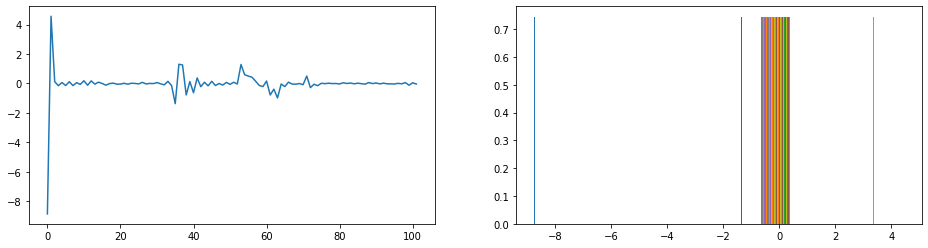

In [22]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [28]:
import matplotlib.pyplot as plt

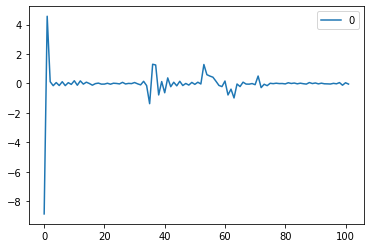

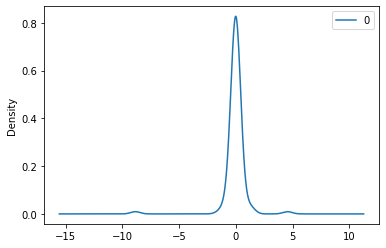

                0
count  102.000000
mean    -0.045656
std      1.046731
min     -8.863416
25%     -0.066554
50%     -0.014062
75%      0.057449
max      4.561194


In [29]:
residuals = pd.DataFrame(result.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [25]:
# Actual vs Fitted
output = result.forecast()
yhat = output[0]
predictions.append(yhat)
obs = PCA1
history.append(obs)
print('predicted=%f, expected=%f' % (yhat, obs))

KeyError: ignored

In [ ]:
size = int(len(X) * 0.45)
end = len(X) - 20
train, test = X[0:size], X[size:len(X)]
#train, test = X[0:size], X[size:end]
print(train)
print(test)
history = [x for x in train]
predictions = list()
print(predictions)

In [ ]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

In [ ]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()